# Diabetes Prediction

###Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

###Importing Dataset and Check Data Structure

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f76146c3b10>],
      dtype=object)

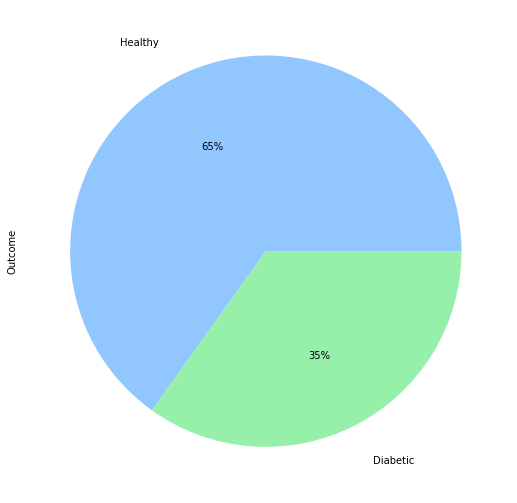

In [ ]:
import matplotlib.style as style
style.available

style.use('seaborn-pastel')
labels = ["Healthy", "Diabetic"]
df['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))

## Exploratory Data Analysis

### Data Shape

In [ ]:
df.shape

(768, 9)

###Check missing values

In [ ]:
# Check if there are any missing values in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check database information 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Create a copy of the original dataset and replace the 0 values of the impacted columns with the mean values

df_1 = df.copy()

coloumn = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in coloumn:
    df_1[i].replace(0,df_1[i].mean(),inplace=True)

df_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
df_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


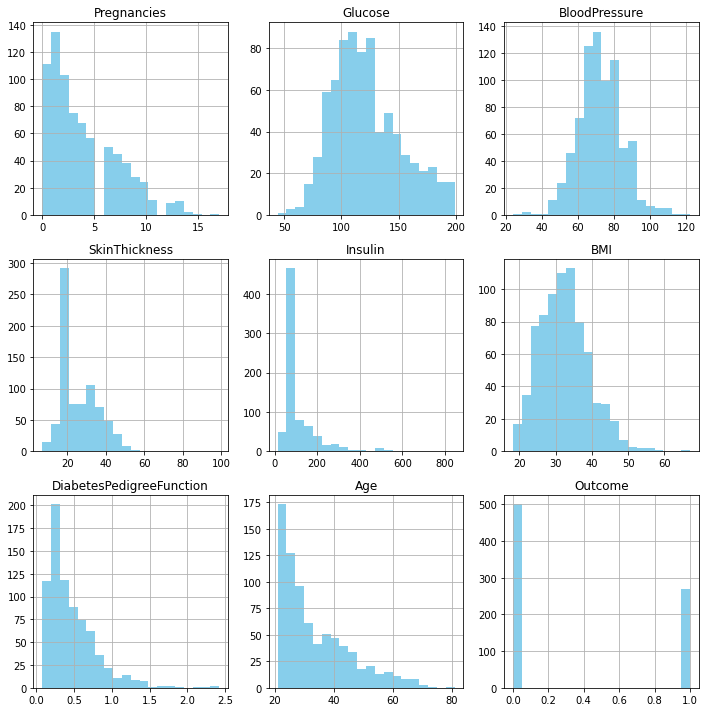

In [ ]:
# Histogram plot of data

col = list(df_1.columns)
df_1[col].hist(stacked=True, bins=20, figsize=(10,10), layout=(3,3), color='skyblue')
plt.tight_layout()

### Check Outliers of Data

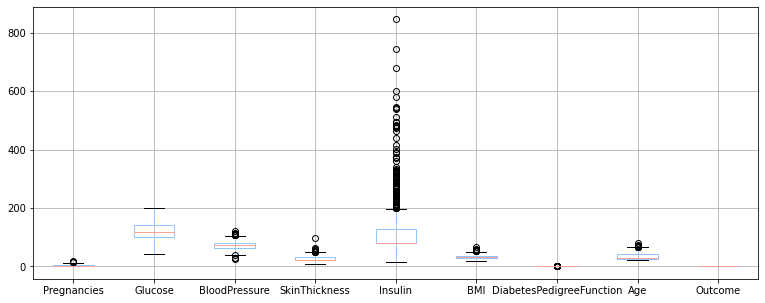

In [ ]:
df_1.boxplot(figsize = (13,5))
plt.show()

### Check Correlation of Data

In [ ]:
df_1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


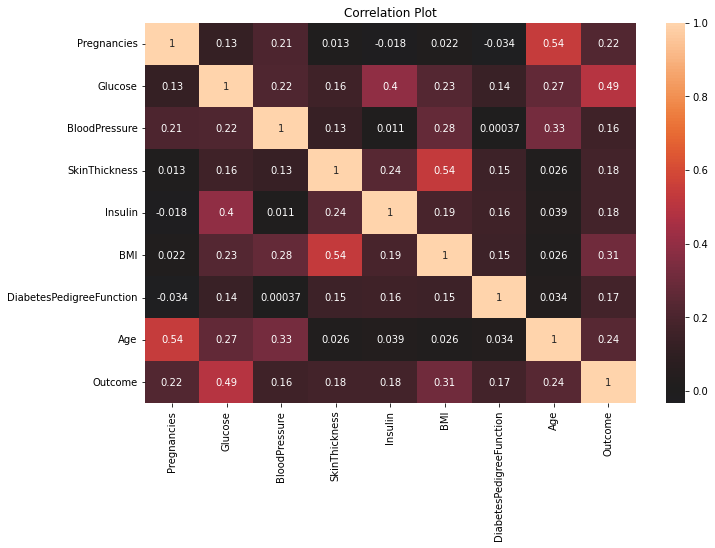

In [ ]:
plt.figure(figsize = (11,7))
sns.heatmap(df_1.corr(), center = 0, annot = True,)
plt.title("Correlation Plot")
plt.show()

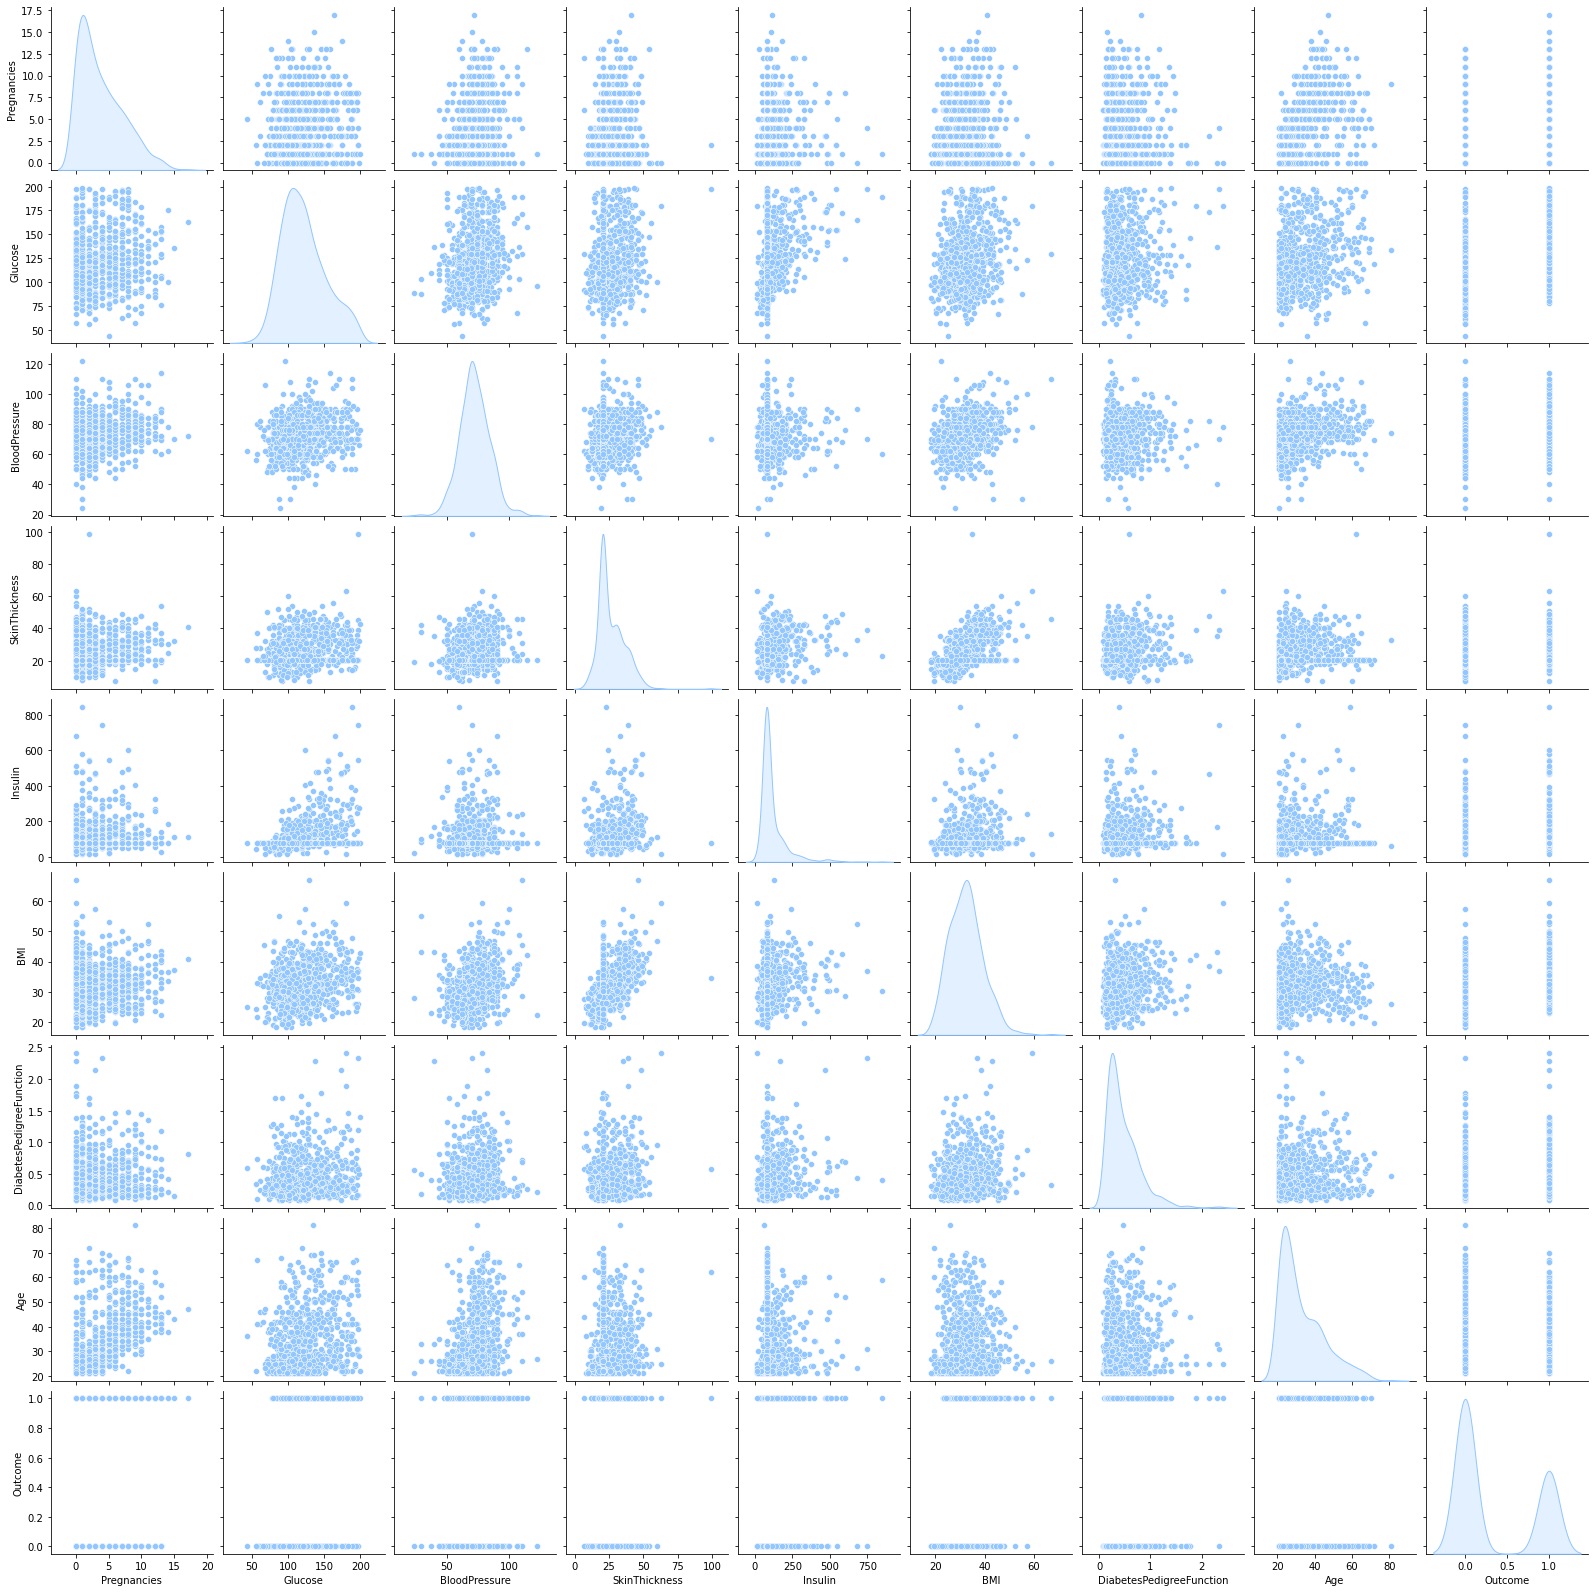

In [ ]:
sns.pairplot(df_1,diag_kind='kde')

### Spliting of Dataset (Training/ Validation/ Testing)

In [ ]:
x = df_1.iloc[:, :-1].values
y = df_1.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 )

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##Imbalanced Dataset (Is there a need for Upsampling/Downsampling?)


In [ ]:
df_1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# Using SMOTE(Synthetic Minority Over Sampling Technique) to increase the number of samples of diabetic patients for training 
# dataset.
from imblearn.over_sampling import SMOTE
print("Before Upsampling, no. of samples in the training dataset: {}".format(len(x_train)))
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1,k_neighbors = 5, random_state=1)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train.ravel())

print("After Upsampling, no. of samples in the training dataset: {}".format(len(x_train_sm)))
print("After UpSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_sm==0)))

Before Upsampling, no. of samples in the training dataset: 614
Before UpSampling, counts of label '1': 221
Before UpSampling, counts of label '0': 393 

After Upsampling, no. of samples in the training dataset: 786
After UpSampling, counts of label '1': 393
After UpSampling, counts of label '0': 393 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



# Perform Machine Learning Algorithms

## RandomForrest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'criterion':['gini','entropy'],'max_depth': np.arange(start=1, stop=20, step=1),'n_estimators': np.arange(start=100, stop=1000, step=100), 'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestClassifier()
clf = RandomizedSearchCV(rf, parameters)

In [ ]:
print(sklearn.__version__)

0.22.2.post1


In [ ]:
clf.fit(x_train_sm, y_train_sm)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'sqrt',
 'n_estimators': 600}

In [ ]:
clf.best_score_

0.8244053857937595

In [ ]:
tuned_rf_model = RandomForestClassifier(criterion = 'entropy', max_depth= 16, max_features='sqrt', n_estimators = 600 )

In [ ]:
tuned_rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=16, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = tuned_rf_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

## Making the Confusion Matrix

Accuracy on Test Data: 82.46753246753246%
Precision Score: 0.717391304347826
Recall Score: 0.7021276595744681
F1 Score: 0.7096774193548387


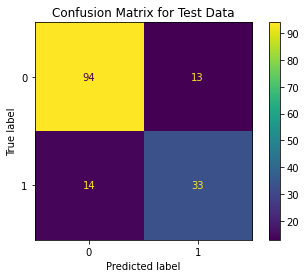

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix,plot_roc_curve
y_pred = tuned_rf_model.predict(x_test)
rf_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: { rf_acc*100}%")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
plot_confusion_matrix( tuned_rf_model, x_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

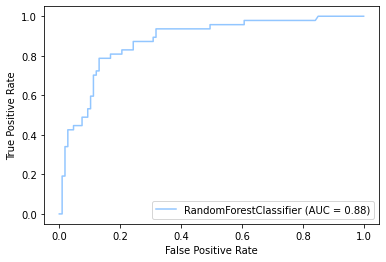

In [ ]:
plot_roc_curve(tuned_rf_model, x_test, y_test)

Accuracy on Train Data: 100.0%


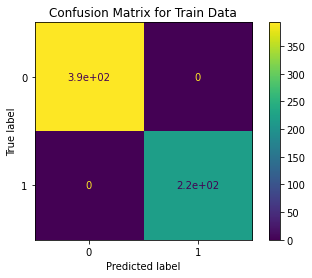

In [ ]:
# Predicting the train set results
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_pred = tuned_rf_model.predict(x_train)
rf_train_acc = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on Train Data: {rf_train_acc*100}%")
plot_confusion_matrix(tuned_rf_model , x_train, y_train)
plt.title("Confusion Matrix for Train Data")
plt.show()

#Saving the Model

##Pickle

In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(tuned_rf_model,open(filename,'wb'))

In [ ]:
load_diabetes_model = pickle.load(open(filename,'rb'))

In [ ]:
load_diabetes_model = pickle.load(open(filename,'rb'))
load_diabetes_model.predict(x_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_values = sc.transform([[1, 85, 66, 29, 0, 26.6, 0.351, 31]])
print(test_values)

[[-0.8354355  -1.2131296  -0.53970675  0.23591266 -1.26199526 -0.86186102
  -0.34682988 -0.21609035]]


In [ ]:
pred_result_diabetes = load_diabetes_model.predict(test_values)
print(pred_result_diabetes)

[0]


##joblib

In [ ]:
import joblib

In [ ]:
filename = 'd_model.sav'
joblib.dump(tuned_rf_model, filename)

['d_model.sav']

In [ ]:
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)

In [ ]:
print(result)

0.8311688311688312


In [ ]:
test_values = sc.transform([[8, 99, 84, 0, 0, 35.4, 0.388, 50]])
print(test_values)

[[ 1.19895644 -0.75014534  0.95709407 -2.75310588 -1.26199526  0.39726625
  -0.23569599  1.3664018 ]]


In [ ]:
pred_result_diabetes = loaded_model.predict(test_values)
print(pred_result_diabetes)

[0]


In [ ]:
from sklearn.externals.joblib import dump, load
dump(sc, 'std_scaler.bin', compress=True)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



['std_scaler.bin']